In [ ]:
#Notes for Normalizing Data 
'''
To normalize the values to be between 0 and 1, we can use the following formula:

xnorm = (xi – xmin) / (xmax – xmin)

where:

xnorm: The ith normalized value in the dataset
xi: The ith value in the dataset
xmax: The minimum value in the dataset
xmin: The maximum value in the dataset

'''
#Normalize in array code 
'''
import numpy as np 

#create NumPy array
data = np.array([[13, 16, 19, 22, 23, 38, 47, 56, 58, 63, 65, 70, 71]])

#normalize all values in array
data_norm = (data - data.min())/ (data.max() - data.min())

#view normalized values
data_norm

array([[0.        , 0.05172414, 0.10344828, 0.15517241, 0.17241379,
        0.43103448, 0.5862069 , 0.74137931, 0.77586207, 0.86206897,
        0.89655172, 0.98275862, 1.        ]])

'''

#Normalize data in dataframe
'''
import pandas as pd

#create DataFrame
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

#normalize values in every column
df_norm = (df-df.min())/ (df.max() - df.min())

#view normalized DataFrame
df_norm

        points	        assists	 rebounds
0	0.764706	0.125	 0.857143
1	0.000000	0.375	 0.428571
2	0.176471	0.375	 0.714286
3	0.117647	0.625	 0.142857
4	0.411765	1.000	 0.142857
5	0.647059	0.625	 0.000000
6	0.764706	0.625	 0.571429
7	1.000000	0.000	 1.00000

'''

#Normalize specific variablesin dataframe

'''
import pandas as pd

#create DataFrame
df = pd.DataFrame({'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

define columns to normalize
x = df.iloc[:,0:2]

#normalize values in first two columns only 
df.iloc[:,0:2] = (x-x.min())/ (x.max() - x.min())

#view normalized DataFrame 
df

	points	        assists	 rebounds
0	0.764706	0.125	 11
1	0.000000	0.375	 8
2	0.176471	0.375	 10
3	0.117647	0.625	 6
4	0.411765	1.000	 6
5	0.647059	0.625	 5
6	0.764706	0.625	 9
7	1.000000	0.000	 12

'''


In [2]:
#import dataset as dataframe 
import pandas as pd 
peer_data = pd.read_csv('Peer_institution_data.csv')
print(peer_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   UnitID                                                                                                                      126 non-null    int64  
 1   Institution Name                                                                                                            126 non-null    object 
 2   Tuition and fees - Total (F2021_F2)                                                                                         125 non-null    float64
 3   Value of endowment assets at the end of the fiscal year (F2021_F2)                                                          1

In [3]:

#remove Na data 
peer_data = peer_data.dropna()

#Normalize data 
#normalize values in columns 2-11

selected_data = peer_data.iloc[:,2:12]
normalized_data = (selected_data-selected_data.min())/ (selected_data.max() - selected_data.min())

#view normalized DataFrame
normalized_data

,Tuition and fees - Total (F2021_F2),Value of endowment assets at the end of the fiscal year (F2021_F2),Percent of full-time first-time undergraduates awarded Pell grants (SFA2021),Average net price-students awarded grant or scholarship aid 2020-21 (SFA2021),Full-time first-time degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduates (DRVEF2021),Graduation rate total cohort (DRVGR2021),Applicants total (ADM2021),Admissions total (ADM2021),Tuition and fees as a percent of core revenues (FASB) (DRVF2021)
0,0.041198,0.027769,0.638889,0.259008,0.793103,0.338028,0.418603,0.416046,0.383721
1,0.157623,0.005690,0.430556,0.375734,0.620690,0.591549,0.386940,0.288880,0.779070
3,0.249753,0.032747,0.388889,0.434546,0.655172,0.549296,0.407062,0.438111,0.697674
4,0.180997,0.066449,0.291667,0.423779,0.827586,0.605634,0.301822,0.313559,0.430233
5,0.488579,0.158152,0.111111,0.475558,0.793103,0.985915,0.768413,0.103939,0.418605
...,...,...,...,...,...,...,...,...,...
121,0.521459,0.038877,0.166667,0.388064,0.655172,0.633803,0.413364,0.456402,0.825581
122,0.286853,0.021918,0.388889,0.527336,0.758621,0.535211,0.284282,0.357205,0.790698
123,0.039843,0.042554,0.347222,0.296489,0.896552,0.577465,0.227563,0.280751,0.453488
124,0.540813,0.199824,0.013889,0.719863,0.551724,0.802817,0.086181,0.074131,0.360465


In [11]:
#add normalied data back into data with school ID and Institution Name 

full_dataset = normalized_data.join(peer_data.iloc[:,0:2])
full_dataset.describe()


,Tuition and fees - Total (F2021_F2),Value of endowment assets at the end of the fiscal year (F2021_F2),Percent of full-time first-time undergraduates awarded Pell grants (SFA2021),Average net price-students awarded grant or scholarship aid 2020-21 (SFA2021),Full-time first-time degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduates (DRVEF2021),Graduation rate total cohort (DRVGR2021),Applicants total (ADM2021),Admissions total (ADM2021),Tuition and fees as a percent of core revenues (FASB) (DRVF2021),Kmeans_4,UnitID
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.203306,0.074686,0.343305,0.383010,0.674330,0.614181,0.305314,0.272468,0.568078,1.461538,203917.162393
std,0.177832,0.133559,0.194956,0.179184,0.187095,0.177974,0.223494,0.184363,0.218096,0.846274,26056.340602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162654.000000
25%,0.098858,0.013722,0.180556,0.259008,0.551724,0.507042,0.144951,0.137133,0.441860,1.000000,193292.000000
50%,0.156725,0.032211,0.333333,0.354954,0.689655,0.619718,0.242065,0.240492,0.593023,1.000000,204200.000000
75%,0.249753,0.065150,0.430556,0.475558,0.793103,0.732394,0.407062,0.324204,0.720930,2.000000,213321.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,442356.000000


In [5]:
#Import necessary packages 
import numpy 
import matplotlib.pyplot as plt 
import pandas as pd
#import kmeans, choose variables for cluster analysis 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

#find optimal number of clusters 

def optimize_k_means(data, max_k):
    sum_c = [] #measure of the sum of the square distances to the nearest clusteer center 
    means = [] 
    
    for cluster in range(1,max_k): #10 clusters
        kmeans=KMeans(n_clusters=cluster, init='k-means++', max_iter= 300, n_init = 10)
        kmeans.fit(normalized_data)
        means.append(cluster)
        sum_c.append(kmeans.inertia_)
    
    #Generate Elbow plot 
    figure = plt.subplots(figsize=(10,5))
    plt.plot(means, sum_c, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    


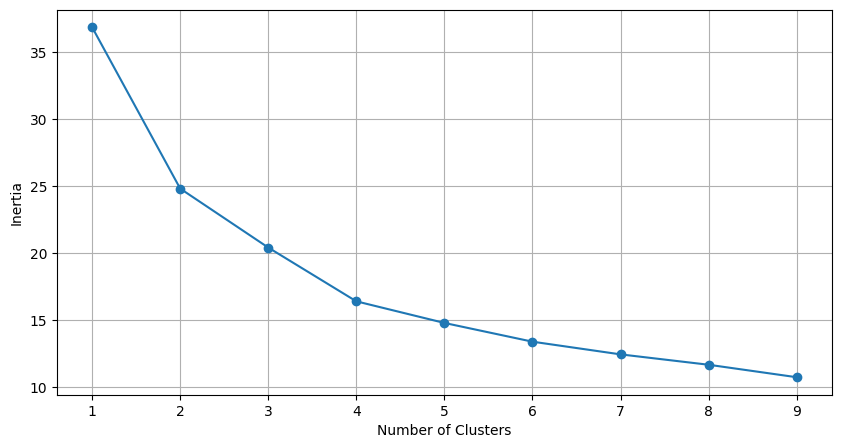

In [6]:
optimize_k_means(normalized_data, 10)

C:\Users\court\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


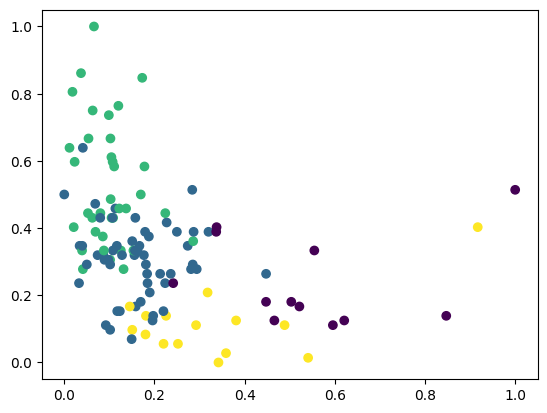

In [7]:
#apply kmeans cluster 
#use most important variables 
kmeans = KMeans(n_clusters = 4)

km = kmeans.fit(normalized_data)
normalized_data['Kmeans_4'] =kmeans.labels_
normalized_data['Tuition and fees - Total (F2021_F2)']

#plot data 
plt.scatter(x = normalized_data['Tuition and fees - Total (F2021_F2)'], 
            y = normalized_data['Percent of full-time first-time undergraduates awarded Pell grants (SFA2021)'], c = normalized_data['Kmeans_4'])




In [9]:
normalized_data

,Tuition and fees - Total (F2021_F2),Value of endowment assets at the end of the fiscal year (F2021_F2),Percent of full-time first-time undergraduates awarded Pell grants (SFA2021),Average net price-students awarded grant or scholarship aid 2020-21 (SFA2021),Full-time first-time degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduates (DRVEF2021),Graduation rate total cohort (DRVGR2021),Applicants total (ADM2021),Admissions total (ADM2021),Tuition and fees as a percent of core revenues (FASB) (DRVF2021),Kmeans_4
0,0.041198,0.027769,0.638889,0.259008,0.793103,0.338028,0.418603,0.416046,0.383721,1
1,0.157623,0.005690,0.430556,0.375734,0.620690,0.591549,0.386940,0.288880,0.779070,1
3,0.249753,0.032747,0.388889,0.434546,0.655172,0.549296,0.407062,0.438111,0.697674,1
4,0.180997,0.066449,0.291667,0.423779,0.827586,0.605634,0.301822,0.313559,0.430233,1
5,0.488579,0.158152,0.111111,0.475558,0.793103,0.985915,0.768413,0.103939,0.418605,3
...,...,...,...,...,...,...,...,...,...,...
121,0.521459,0.038877,0.166667,0.388064,0.655172,0.633803,0.413364,0.456402,0.825581,0
122,0.286853,0.021918,0.388889,0.527336,0.758621,0.535211,0.284282,0.357205,0.790698,1
123,0.039843,0.042554,0.347222,0.296489,0.896552,0.577465,0.227563,0.280751,0.453488,1
124,0.540813,0.199824,0.013889,0.719863,0.551724,0.802817,0.086181,0.074131,0.360465,3


In [8]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 125
Data columns (total 10 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Tuition and fees - Total (F2021_F2)                                                                                         117 non-null    float64
 1   Value of endowment assets at the end of the fiscal year (F2021_F2)                                                          117 non-null    float64
 2   Percent of full-time first-time undergraduates awarded Pell grants (SFA2021)                                                117 non-null    float64
 3   Average net price-students awarded grant or scholarship aid  2020-21 (SFA2021)                                              1

In [5]:
#print(peer_data['Percent of full-time first-time undergraduates awarded Pell grants (SFA2021)'])
c_grants = peer_data.iloc[(peer_data['Percent of full-time first-time undergraduates awarded Pell grants (SFA2021)'] - 41).abs().argsort()[:30]]
#print(c_grants)
grants_int = c_grants['Institution Name']
print(grants_int)

62          Marymount Manhattan College
14                  Cedar Crest College
13                    Carlow University
22           Delaware Valley University
1                   Alvernia University
38                      Goucher College
84                Point Park University
9                    Cabrini University
15                 Centenary University
115                    Utica University
86                     Rider University
64                     McDaniel College
103           The College of Saint Rose
27                   Eastern University
105         Thomas Jefferson University
58                    Malone University
79                   Niagara University
43                         Hood College
88             Roberts Wesleyan College
19        Culinary Institute of America
59                    Manhattan College
3                    Arcadia University
122                   Wilkes University
36            Georgian Court University
54                     Le Moyne College


In [6]:
c_tuition = peer_data.iloc[(peer_data['Tuition and fees - Total (F2021_F2)'] - 33114279).abs().argsort()[:30]]
print(c_tuition)
tuition_int = c_tuition['Institution Name']
print(tuition_int)

     UnitID                         Institution Name  \
13   211431                        Carlow University   
89   195128                     Russell Sage College   
36   184773                Georgian Court University   
62   192864              Marymount Manhattan College   
25   190761            Dominican College of Blauvelt   
10   183910                      Caldwell University   
104  215105               The University of the Arts   
119  206437                         Walsh University   
28   212197                    Elizabethtown College   
83   442356  Pennsylvania College of Health Sciences   
22   211981               Delaware Valley University   
77   214272                       Neumann University   
98   195173                      St. Francis College   
95   215947                    Seton Hill University   
64   164270                         McDaniel College   
26   184348                          Drew University   
55   213507                   Lebanon Valley Col

In [7]:
c_endowment = peer_data.iloc[(peer_data['Value of endowment assets at the end of the fiscal year (F2021_F2)'] - 42966807).abs().argsort()[:30]]
print(c_endowment)
endowment_int = c_endowment['Institution Name']
print(endowment_int)

     UnitID                Institution Name  \
13   211431               Carlow University   
77   214272              Neumann University   
14   211468             Cedar Crest College   
103  195234       The College of Saint Rose   
39   212832        Gwynedd Mercy University   
92   186432        Saint Peter's University   
22   211981      Delaware Valley University   
18   193399  College of Mount Saint Vincent   
119  206437                Walsh University   
67   213987           Mercyhurst University   
89   195128            Russell Sage College   
9    211352              Cabrini University   
87   215655        Robert Morris University   
115  197045                Utica University   
98   195173             St. Francis College   
88   194958        Roberts Wesleyan College   
27   212133              Eastern University   
70   193292                  Molloy College   
106  196653                Trocaire College   
60   192749          Manhattanville College   
62   192864  

In [8]:
c_firstTime = peer_data.iloc[(peer_data['Full-time  first-time  degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduates (DRVEF2021)'] - 15).abs().argsort()[:30]]
firstTime_int = c_firstTime['Institution Name']
print(c_firstTime)

     UnitID                  Institution Name  \
30   184612               Felician University   
25   190761     Dominican College of Blauvelt   
115  197045                  Utica University   
13   211431                 Carlow University   
42   212984            Holy Family University   
80   204468                Notre Dame College   
74   193353          Mount Saint Mary College   
70   193292                    Molloy College   
14   211468               Cedar Crest College   
18   193399    College of Mount Saint Vincent   
103  195234         The College of Saint Rose   
99   195544  St. Joseph's University-New York   
98   195173               St. Francis College   
20   190716                D'Youville College   
17   211583             Chestnut Hill College   
60   192749            Manhattanville College   
100  195243        St. Thomas Aquinas College   
105  216366       Thomas Jefferson University   
44   213011             Immaculata University   
36   184773         

In [9]:
c_applicants = peer_data.iloc[(peer_data['Applicants total (ADM2021)'] - 1044).abs().argsort()[:30]]
print(c_applicants)
applicants_int = c_applicants['Institution Name']

     UnitID                         Institution Name  \
13   211431                        Carlow University   
39   212832                 Gwynedd Mercy University   
17   211583                    Chestnut Hill College   
14   211468                      Cedar Crest College   
104  215105               The University of the Arts   
88   194958                 Roberts Wesleyan College   
15   183974                     Centenary University   
124  197708                       Yeshiva University   
100  195243               St. Thomas Aquinas College   
48   213303                         Keystone College   
36   184773                Georgian Court University   
106  196653                         Trocaire College   
35   212656                           Geneva College   
25   190761            Dominican College of Blauvelt   
58   203775                        Malone University   
83   442356  Pennsylvania College of Health Sciences   
65   192925                         Medaille Col

In [10]:
c_admissions = peer_data.iloc[(peer_data['Admissions total (ADM2021)'] - 961).abs().argsort()[:30]]
print(c_admissions)
admissions_int = c_admissions['Institution Name']
print(c_admissions)

     UnitID                       Institution Name  \
13   211431                      Carlow University   
41   212911                      Haverford College   
102  216287                     Swarthmore College   
124  197708                     Yeshiva University   
14   211468                    Cedar Crest College   
104  215105             The University of the Arts   
39   212832               Gwynedd Mercy University   
65   192925                       Medaille College   
88   194958               Roberts Wesleyan College   
17   211583                  Chestnut Hill College   
5    189097                        Barnard College   
36   184773              Georgian Court University   
25   190761          Dominican College of Blauvelt   
35   212656                         Geneva College   
48   213303                       Keystone College   
58   203775                      Malone University   
100  195243             St. Thomas Aquinas College   
27   212133                 

In [12]:
c_tuition_as_revenue = peer_data.iloc[(peer_data['Tuition and fees as a percent of core revenues (FASB) (DRVF2021)'] - 62).abs().argsort()[:30]]
print(c_tuition_as_revenue)
tuition_rev_int = c_tuition_as_revenue['Institution Name']
print(tuition_rev_int)

     UnitID                   Institution Name  \
13   211431                  Carlow University   
77   214272                 Neumann University   
119  206437                   Walsh University   
118  197197                     Wagner College   
67   213987              Mercyhurst University   
17   211583              Chestnut Hill College   
76   193584                   Nazareth College   
101  186867    Stevens Institute of Technology   
92   186432           Saint Peter's University   
36   184773          Georgian Court University   
50   213367                La Salle University   
86   186283                   Rider University   
3    211088                 Arcadia University   
20   190716                 D'Youville College   
90   195720          Saint John Fisher College   
89   195128               Russell Sage College   
22   211981         Delaware Valley University   
103  195234          The College of Saint Rose   
44   213011              Immaculata University   


In [14]:
c_grad_rate = peer_data.iloc[(peer_data['Graduation rate  total cohort (DRVGR2021)'] - 52).abs().argsort()[:30]]
print(c_grad_rate)
grad_rate_int = c_grad_rate['Institution Name']
print(grad_rate_int)

     UnitID                         Institution Name  \
66   203960                    Mercy College of Ohio   
9    211352                       Cabrini University   
98   195173                      St. Francis College   
13   211431                        Carlow University   
30   184612                      Felician University   
73   204200            Mount Saint Joseph University   
22   211981               Delaware Valley University   
77   214272                       Neumann University   
39   212832                 Gwynedd Mercy University   
78   194091         New York Institute of Technology   
18   193399           College of Mount Saint Vincent   
42   212984                   Holy Family University   
100  195243               St. Thomas Aquinas College   
83   442356  Pennsylvania College of Health Sciences   
21   190725                        Daemen University   
0    210571                         Albright College   
36   184773                Georgian Court Univer

In [15]:
c_grants_schol = peer_data.iloc[(peer_data['Average net price-students awarded grant or scholarship aid  2020-21 (SFA2021)'] - 18638).abs().argsort()[:30]]
print(c_grants_schol)
grants_schol_int = c_grants_schol['Institution Name']
print(grants_schol_int)

     UnitID                       Institution Name  \
13   211431                      Carlow University   
58   203775                      Malone University   
48   213303                       Keystone College   
100  195243             St. Thomas Aquinas College   
11   189705                       Canisius College   
66   203960                  Mercy College of Ohio   
79   193973                     Niagara University   
80   204468                     Notre Dame College   
57   213668                       Lycoming College   
31   205957  Franciscan University of Steubenville   
102  216287                     Swarthmore College   
35   212656                         Geneva College   
30   184612                    Felician University   
109  237312               University of Charleston   
73   204200          Mount Saint Joseph University   
38   162654                        Goucher College   
21   190725                      Daemen University   
26   184348                 

In [18]:
from collections import Counter
c_peer_all = pd.concat([grants_schol_int, grad_rate_int, tuition_rev_int, admissions_int, applicants_int, firstTime_int,
                       endowment_int, tuition_int, grants_int])
print(c_peer_all)

count_dict = dict(Counter(c_peer_all))
print(count_dict)

13                    Carlow University
58                    Malone University
48                     Keystone College
100          St. Thomas Aquinas College
11                     Canisius College
                     ...               
73        Mount Saint Joseph University
42               Holy Family University
57                     Lycoming College
11                     Canisius College
99     St. Joseph's University-New York
Name: Institution Name, Length: 270, dtype: object
{'Carlow University': 9, 'Malone University': 5, 'Keystone College': 6, 'St. Thomas Aquinas College': 5, 'Canisius College': 2, 'Mercy College of Ohio': 4, 'Niagara University': 2, 'Notre Dame College': 2, 'Lycoming College': 2, 'Franciscan University of Steubenville': 3, 'Swarthmore College': 2, 'Geneva College': 4, 'Felician University': 4, 'University of Charleston': 6, 'Mount Saint Joseph University': 5, 'Goucher College': 4, 'Daemen University': 4, 'Drew University': 2, 'Dominican College of Blauvel

In [93]:
#take schools from carlow cluster 
#find the five schools closest to each other variable 

df_closest_pell_grants = peer_data.iloc[(peer_data['Percent of full-time first-time undergraduates awarded Pell grants (SFA2021)'] - 41).abs().argsort()[:20]]
df_closest_tuition = peer_data.iloc[(peer_data['Tuition and fees - Total (F2021_F2)'] - 33114279).abs().argsort()[:20]]
df_closest_endowment = peer_data.iloc[(peer_data['Value of endowment assets at the end of the fiscal year (F2021_F2)'] - 42966807).abs().argsort()[:20]] 
df_closest_first_time = peer_data.iloc[(peer_data['Full-time  first-time  degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduates (DRVEF2021)'] - 15).abs().argsort()[:20]] 
df_closest_applicants = peer_data.iloc[(peer_data['Applicants total (ADM2021)'] - 1044).abs().argsort()[:20]] 
df_closest_admissions = peer_data.iloc[(peer_data['Admissions total (ADM2021)'] - 961).abs().argsort()[:20]]
df_closest_tuition_as_percent_revenue = peer_data.iloc[(peer_data['Tuition and fees as a percent of core revenues (FASB) (DRVF2021)'] - 62).abs().argsort()[:20]]
#view results 

#df_closest_grad_rate - peer_data.iloc[(peer_data['Graduation rate  total cohort (DRVGR2021)'] - float(50)).abs().argsort()[:20]]
df_closest_grad_rate = peer_data.iloc[(peer_data['Graduation rate  total cohort (DRVGR2021)'] - float(70)).abs().argsort()[:15]] 
#df_closest_grants = peer_data.iloc[(peer_data['Average net price-students awarded grant or scholarship aid  2020-21 (SFA2021)'] - int(18638)).abs().argsort()[:15]]

#print(df_closest_grad_rate)
print(df_closest_tuition)


     UnitID                               Institution Name  \
13   211431                              Carlow University   
88   194958                       Roberts Wesleyan College   
35   212656                                 Geneva College   
61   163295              Maryland Institute College of Art   
25   190761                  Dominican College of Blauvelt   
10   183910                            Caldwell University   
103  195234                      The College of Saint Rose   
118  197197                                 Wagner College   
28   212197                          Elizabethtown College   
82   204936                           Otterbein University   
22   211981                     Delaware Valley University   
109  237312                       University of Charleston   
76   193584                               Nazareth College   
97   195526                               Skidmore College   
94   195304                         Sarah Lawrence College   
63   213

In [88]:
from collections import Counter 
closest_peers = df_closest_pell_grants['Institution Name']

closest_peers2 = (df_closest_tuition['Institution Name'])

closest_peers3 = (df_closest_endowment['Institution Name'])

closest_peers4 = df_closest_first_time['Institution Name']

closest_peers5 = df_closest_applicants['Institution Name']

closest_peers6 = df_closest_admissions['Institution Name']

closest_peers7 = df_closest_tuition_as_percent_revenue['Institution Name']

closest_peer_all = pd.concat([closest_peers, closest_peers2, closest_peers3, closest_peers4, closest_peers5, closest_peers6, closest_peers7])



new_dict = dict(Counter(closest_peer_all))
print(new_dict)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [75]:
df_closest_pell_grants = peer_data.iloc[(peer_data['Percent of full-time first-time undergraduates awarded Pell grants (SFA2021)'] - 41).abs().argsort()[:30]]
df_closest_tuition = peer_data.iloc[(peer_data['Tuition and fees - Total (F2021_F2)'] - 33114279).abs().argsort()[:30]]
df_closest_endowment = peer_data.iloc[(peer_data['Value of endowment assets at the end of the fiscal year (F2021_F2)'] - 42966807).abs().argsort()[:30]] 
df_closest_first_time = peer_data.iloc[(peer_data['Full-time  first-time  degree/certificate seeking undergraduates (GRS Cohort) as percent of all undergraduates (DRVEF2021)'] - 15).abs().argsort()[:30]] 
df_closest_applicants = peer_data.iloc[(peer_data['Applicants total (ADM2021)'] - 1044).abs().argsort()[:30]] 
df_closest_admissions = peer_data.iloc[(peer_data['Admissions total (ADM2021)'] - 961).abs().argsort()[:30]]
df_closest_tuition_as_percent_revenue = peer_data.iloc[(peer_data['Tuition and fees as a percent of core revenues (FASB) (DRVF2021)'] - 62).abs().argsort()[:30]]
#view results 